In [1]:
#-*- coding: utf-8 -*-

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping


import matplotlib.pyplot as plt
import numpy as np

import os
import tensorflow as tf


In [2]:
# seed 값 설정
seed = 42
np.random.seed(seed)
tf.random.set_seed(42)


In [3]:
# mnist 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
# 정규화
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float64') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float64') / 255

# 28, 28, 1 : 28*28 , 1 1channel (흑백) , 3 channel (컬러 :rgb)
# astype('float32') : 정규화 위해 실수형으로 타입 변경
# 255 나눈 이유 : 0~ 1 사이로 스케일링

In [6]:
# 바이너리화 (one-hot-encoding)
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

# np 제공하는 to_categorical : one-hot encoding

In [40]:
# 모델 생성 (프레임 설정 : 환경설정), 컨볼루션 신경망 (cnn)
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = (28,28,1), activation = 'relu'))
# 32 : mask 개수, kernel_size = (3,3) : kernel(윈도우)  필터 3*3 사용, input_shape 사용에 유의

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))
# maxpooling 가장 큰 특징값(max) 추출 (특성정보), pool_size = 2 : 크기로 1/2 로 줄임

model.add(Dropout(0.25))
# dropout : 은닉층의 연결층을 무작위(random하게)로 끊는다 >> 과적합 방지

model.add(Flatten())
# flatten() : 1차원으로 차원 축소 (2차원 >> 1차원)

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation = 'softmax'))
# 출력결과가 10개 분류 (0~9), 다중 분류 : softmax


In [41]:
# 모델실행 환경설정
model.compile(loss = 'categorical_crossentropy', # loss : cost function : 범주형 크로스 엔트로피
              optimizer = 'adam',            # 최적화 함수 : adam
              metrics = ['accuracy'])       # 측정지표 : 정확도

In [42]:
# 모델 최적화 설정
MODEL_DIR = './model/' # 모델 디렉토리 생성(폴더)
if not os.path.exists(MODEL_DIR): # 모델 디렉토리에 폴더가 없다면, 
  os.mkdir(MODEL_DIR)             # 만들어 주세요(mkdir : make a directory)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5' # 모델 저장 경로 생성
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss',
                               verbose = 1, save_best_only=True)
# val_loss 를 monitoring 주시함. verbose : 결과 상황판 , 성능이 나아진 것만 보기
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)
# val_loss 를 monitoring 주시함. 성능이 x 이상 돌려서 나아지지 않으면 그만 둬

In [43]:
# 모델 실행 (학습 : 훈련용 데이터 셋으로 하세요)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
          epochs = 30, batch_size = 200, verbose = 1,
          callbacks = [early_stopping_callback, checkpointer])

# 모델 학습 : fit , 훈련용 데이터로 함 
# 검증 데이터(validation_data : 테스트 데이터 사용)
# epochs : 반복횟수, batch_size : 샘플 200개 추출,  verbose: 훈련상황 보여줌 
# callbacks : 조기종료, 성능개선 여부 확인


Epoch 1/30
299/300 [============================>.] - ETA: 0s - loss: 0.2657 - accuracy: 0.9177
Epoch 1: val_loss improved from inf to 0.05575, saving model to ./model/01-0.0557.hdf5
300/300 [==============================] - 16s 24ms/step - loss: 0.2650 - accuracy: 0.9179 - val_loss: 0.0557 - val_accuracy: 0.9821
Epoch 2/30
298/300 [============================>.] - ETA: 0s - loss: 0.0853 - accuracy: 0.9736
Epoch 2: val_loss improved from 0.05575 to 0.04059, saving model to ./model/02-0.0406.hdf5
300/300 [==============================] - 7s 23ms/step - loss: 0.0855 - accuracy: 0.9735 - val_loss: 0.0406 - val_accuracy: 0.9868
Epoch 3/30
298/300 [============================>.] - ETA: 0s - loss: 0.0630 - accuracy: 0.9805
Epoch 3: val_loss improved from 0.04059 to 0.03338, saving model to ./model/03-0.0334.hdf5
300/300 [==============================] - 7s 23ms/step - loss: 0.0628 - accuracy: 0.9805 - val_loss: 0.0334 - val_accuracy: 0.9886
Epoch 4/30
298/300 [==========================

In [44]:
# 테스트 정확도 출력
print('\n Test Accuracy : %.4f' %(model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.0306 - accuracy: 0.9929

 Test Accuracy : 0.9929


In [45]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

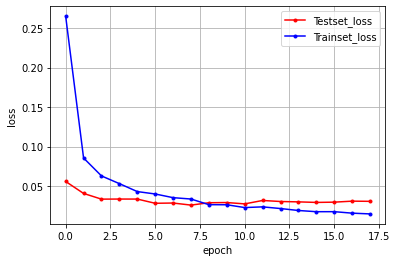

In [46]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c='red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label = 'Trainset_loss')

# 그래프에서 그리드를 주고 레이블을 표시
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
